In [19]:
import os
import requests
import pandas as pd
import numpy as np 
import seaborn as sns 
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [20]:
import yfinance as yf


In [21]:
def read_data(data, start, end):
    data_df = yf.download(data, start, end)
    data_df.dropna(inplace = True)
    dataclose_df = data_df["Close"]
    return dataclose_df

In [22]:
defport = read_data(['GROW.AX', 'DHOF.AX', 'IHCB.AX', 'VDCO.AX', 'MVA.AX', 'GOLD.AX'],"2019-04-01","2022-03-31")
shareport = read_data(['VHY.AX', 'EX20.AX', '360.AX', 'ANZ.AX', 'SQ2.AX', 'CBA.AX', 'PXA.AX', 'ALD.AX', 'AMC.AX', 'BHP.AX', 'APA.AX', 'BXB.AX', 'CHC.AX', 'COL.AX', 'WES.AX', 'CSL.AX', 'RMD.AX', 'TLS.AX', 'QAN.AX', 'VCX.AX', 'ANN.AX'],"2019-04-01","2022-03-31")
growport = read_data(['QUAL.AX',  'FEMX.AX',   'ACDC.AX', 'CLDD.AX'],"2019-04-01","2022-03-31")
# 'MCSG.XA','MCSI.XA', include these 

[*********************100%***********************]  6 of 6 completed
[*********************100%***********************]  21 of 21 completed
[*********************100%***********************]  4 of 4 completed


In [23]:
close_df = pd.concat([defport, shareport, growport], axis = "columns", join = "inner")
close_df.dropna(inplace = True)
close_df.head()

,DHOF.AX,GOLD.AX,GROW.AX,IHCB.AX,MVA.AX,VDCO.AX,360.AX,ALD.AX,AMC.AX,ANN.AX,...,RMD.AX,SQ2.AX,TLS.AX,VCX.AX,VHY.AX,WES.AX,ACDC.AX,CLDD.AX,FEMX.AX,QUAL.AX
Date,,,,,,,,,,,,,,,,,,,,,
2022-01-20,9.9566,236.800003,3.79,106.879997,24.490000,53.070000,8.53,30.750000,17.150000,33.610001,...,33.360001,176.630005,4.15,1.670,66.250000,54.299999,96.260002,13.20,7.08,41.400002
2022-01-21,9.9437,238.320007,3.77,107.220001,24.059999,52.910000,8.11,30.030001,16.780001,32.990002,...,32.790001,172.500000,4.09,1.630,64.760002,53.070000,95.199997,12.91,7.08,40.650002
2022-01-24,9.9218,238.490005,3.74,107.309998,24.350000,52.830002,7.39,29.799999,16.840000,33.099998,...,32.730000,166.250000,4.05,1.670,64.250000,53.000000,94.070000,12.73,7.04,40.610001
2022-01-25,9.9400,240.529999,3.74,107.120003,23.440001,52.520000,7.62,29.010000,16.610001,32.150002,...,32.660000,159.250000,3.93,1.610,62.650002,52.549999,91.139999,12.70,6.97,40.119999
2022-01-27,9.9200,238.800003,3.73,106.000000,22.830000,52.150002,7.10,29.110001,16.340000,31.219999,...,31.400000,150.729996,3.88,1.585,62.250000,50.610001,89.440002,12.18,6.80,39.549999


In [24]:
close_df_std = close_df.std()
close_df_std

DHOF.AX     0.126294
GOLD.AX     5.908648
GROW.AX     0.050456
IHCB.AX     1.766298
MVA.AX      0.408345
VDCO.AX     0.586125
360.AX      1.382998
ALD.AX      1.128775
AMC.AX      0.696528
ANN.AX      2.345047
ANZ.AX      0.969854
APA.AX      0.239957
BHP.AX      1.679631
BXB.AX      0.243841
CBA.AX      4.695993
CHC.AX      0.597297
COL.AX      0.640255
CSL.AX      6.986143
EX20.AX     0.389722
PXA.AX      1.024886
QAN.AX      0.247732
RMD.AX      0.938793
SQ2.AX     17.349968
TLS.AX      0.075796
VCX.AX      0.087667
VHY.AX      1.853850
WES.AX      2.044950
ACDC.AX     4.986560
CLDD.AX     0.856838
FEMX.AX     0.457531
QUAL.AX     1.483699
dtype: float64

In [25]:
correlation = close_df.corr()
correlation

,DHOF.AX,GOLD.AX,GROW.AX,IHCB.AX,MVA.AX,VDCO.AX,360.AX,ALD.AX,AMC.AX,ANN.AX,...,RMD.AX,SQ2.AX,TLS.AX,VCX.AX,VHY.AX,WES.AX,ACDC.AX,CLDD.AX,FEMX.AX,QUAL.AX
DHOF.AX,1.000000,-0.470144,0.776042,0.942057,-0.350792,0.880307,0.790076,0.215017,0.844678,0.665187,...,-0.219240,-0.281612,0.574247,-0.708595,-0.791208,0.537722,0.765720,0.659772,0.848244,0.664764
GOLD.AX,-0.470144,1.000000,-0.659922,-0.496832,-0.196813,-0.693015,-0.769477,-0.537527,-0.625833,-0.441832,...,0.094379,-0.433145,-0.515147,0.317889,0.057462,-0.711942,-0.787685,-0.844143,-0.639541,-0.890588
GROW.AX,0.776042,-0.659922,1.000000,0.764542,0.011123,0.899439,0.872506,0.662881,0.873874,0.472816,...,-0.094555,-0.034019,0.714399,-0.425097,-0.411634,0.674589,0.919054,0.854185,0.946774,0.827178
IHCB.AX,0.942057,-0.496832,0.764542,1.000000,-0.308076,0.910239,0.760731,0.188881,0.817261,0.730523,...,-0.185477,-0.112631,0.547374,-0.747091,-0.772728,0.528678,0.751968,0.690052,0.804206,0.690111
MVA.AX,-0.350792,-0.196813,0.011123,-0.308076,1.000000,-0.085452,-0.040920,0.304935,0.010560,-0.100545,...,0.069595,0.441712,0.161710,0.701317,0.600485,-0.007043,0.149778,0.042900,-0.029180,0.107783
VDCO.AX,0.880307,-0.693015,0.899439,0.910239,-0.085452,1.000000,0.915500,0.470834,0.883737,0.635655,...,-0.050753,0.042556,0.710155,-0.628312,-0.539199,0.746790,0.914935,0.889517,0.911421,0.887640
360.AX,0.790076,-0.769477,0.872506,0.760731,-0.040920,0.915500,1.000000,0.519485,0.882106,0.557760,...,-0.137968,0.015225,0.715765,-0.565734,-0.414937,0.856782,0.933282,0.921102,0.903531,0.934090
ALD.AX,0.215017,-0.537527,0.662881,0.188881,0.304935,0.470834,0.519485,1.000000,0.426339,0.002257,...,0.136239,0.170348,0.580359,0.107511,0.290407,0.530539,0.608928,0.642860,0.583618,0.557787
AMC.AX,0.844678,-0.625833,0.873874,0.817261,0.010560,0.883737,0.882106,0.426339,1.000000,0.636389,...,-0.158723,-0.114386,0.712744,-0.480156,-0.558578,0.666997,0.906185,0.749446,0.931008,0.805893
ANN.AX,0.665187,-0.441832,0.472816,0.730523,-0.100545,0.635655,0.557760,0.002257,0.636389,1.000000,...,-0.229803,0.119404,0.453664,-0.565257,-0.503047,0.462682,0.594175,0.489159,0.531854,0.495839


<AxesSubplot:>

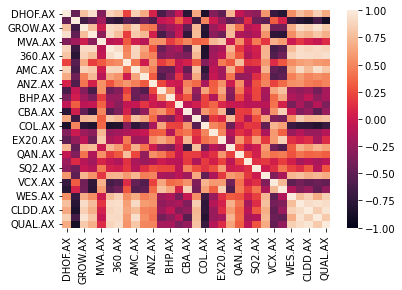

In [28]:
sns.heatmap(correlation, vmin=-1, vmax=1)

In [6]:
datareturns_df = close_df.pct_change().copy()
datareturns_df.head(10)

,DHOF.AX,GOLD.AX,GROW.AX,IHCB.AX,MVA.AX,VDCO.AX,360.AX,ALD.AX,AMC.AX,ANN.AX,...,RMD.AX,SQ2.AX,TLS.AX,VCX.AX,VHY.AX,WES.AX,ACDC.AX,CLDD.AX,FEMX.AX,QUAL.AX
Date,,,,,,,,,,,,,,,,,,,,,
2022-01-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-21,-0.001296,0.006419,-0.005277,0.003181,-0.017558,-0.003015,-0.049238,-0.023415,-0.021574,-0.018447,...,-0.017086,-0.023382,-0.014458,-0.023952,-0.022491,-0.022652,-0.011012,-0.021970,0.000000,-0.018116
2022-01-24,-0.002202,0.000713,-0.007958,0.000839,0.012053,-0.001512,-0.088779,-0.007659,0.003576,0.003334,...,-0.001830,-0.036232,-0.009780,0.024540,-0.007875,-0.001319,-0.011870,-0.013943,-0.005650,-0.000984
2022-01-25,0.001834,0.008554,0.000000,-0.001771,-0.037372,-0.005868,0.031123,-0.026510,-0.013658,-0.028701,...,-0.002139,-0.042105,-0.029630,-0.035928,-0.024903,-0.008491,-0.031147,-0.002357,-0.009943,-0.012066
2022-01-27,-0.002012,-0.007192,-0.002674,-0.010456,-0.026024,-0.007045,-0.068241,0.003447,-0.016255,-0.028927,...,-0.038579,-0.053501,-0.012723,-0.015528,-0.006385,-0.036917,-0.018653,-0.040945,-0.024390,-0.014207
2022-01-28,0.000000,-0.001591,-0.002681,0.004528,0.022339,0.006903,0.076056,-0.005496,0.028764,0.000641,...,-0.004777,-0.009686,0.020619,0.012618,0.023775,0.042087,0.010733,0.017241,0.014706,0.021997
2022-01-31,0.000000,-0.003733,0.013441,-0.004508,0.013710,0.001143,0.073298,0.026943,0.000595,-0.143406,...,0.020800,0.081329,-0.010101,0.015576,-0.007532,-0.000569,0.010841,0.035512,0.010145,0.023998
2022-02-01,-0.006048,-0.001726,0.000000,0.002830,0.005072,0.003424,0.042683,0.010764,0.008323,-0.003363,...,0.024765,0.060653,0.005102,0.003067,0.004427,0.001707,0.014226,0.040530,0.014347,0.007973
2022-02-02,0.000000,-0.009995,0.002653,0.000847,0.005467,0.002085,0.011696,0.014975,-0.035377,-0.026247,...,0.003365,-0.056367,0.010152,0.006116,0.014009,0.015909,0.010466,0.013483,0.001414,0.011026


array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabe

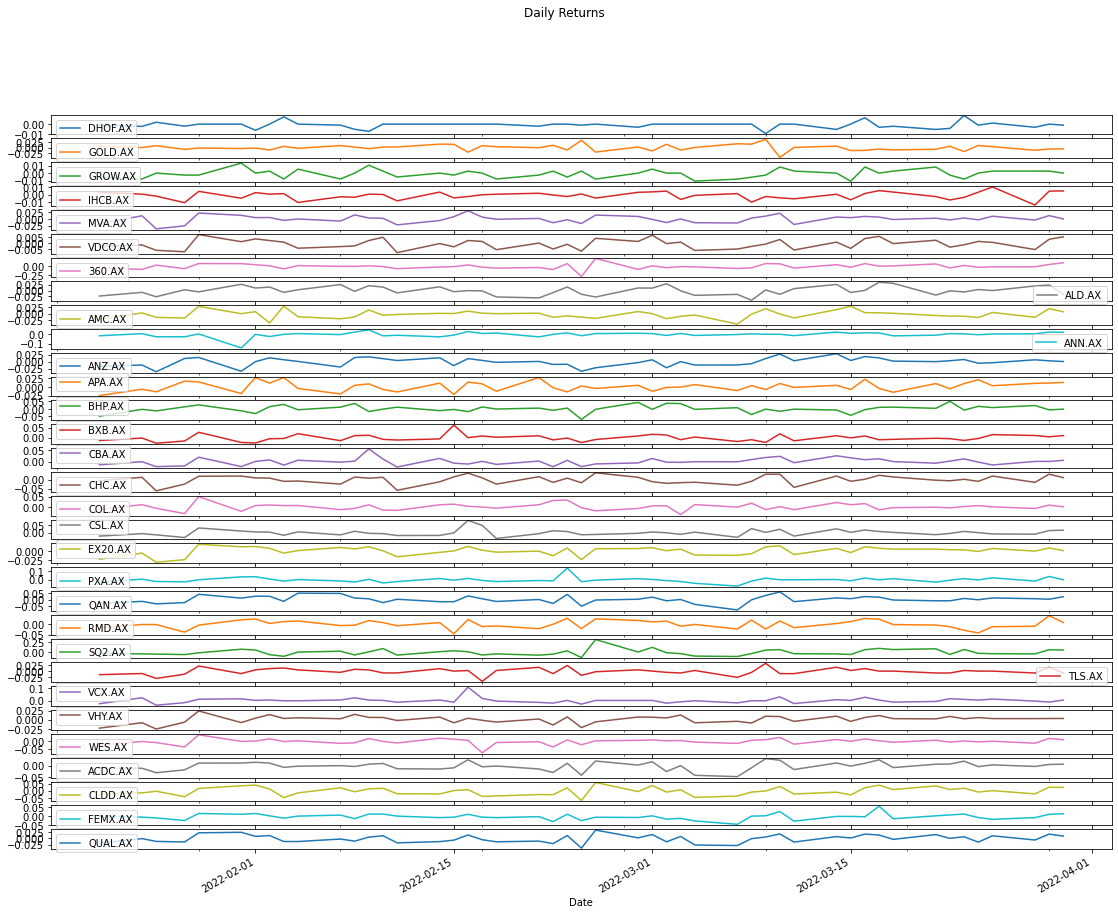

In [30]:
datareturns_df.plot(subplots=True,figsize=(19, 15), title="Daily Returns")

#graph individually,for loop graphing each column

<AxesSubplot:title={'center':'Cumulative Returns'}, xlabel='Date'>

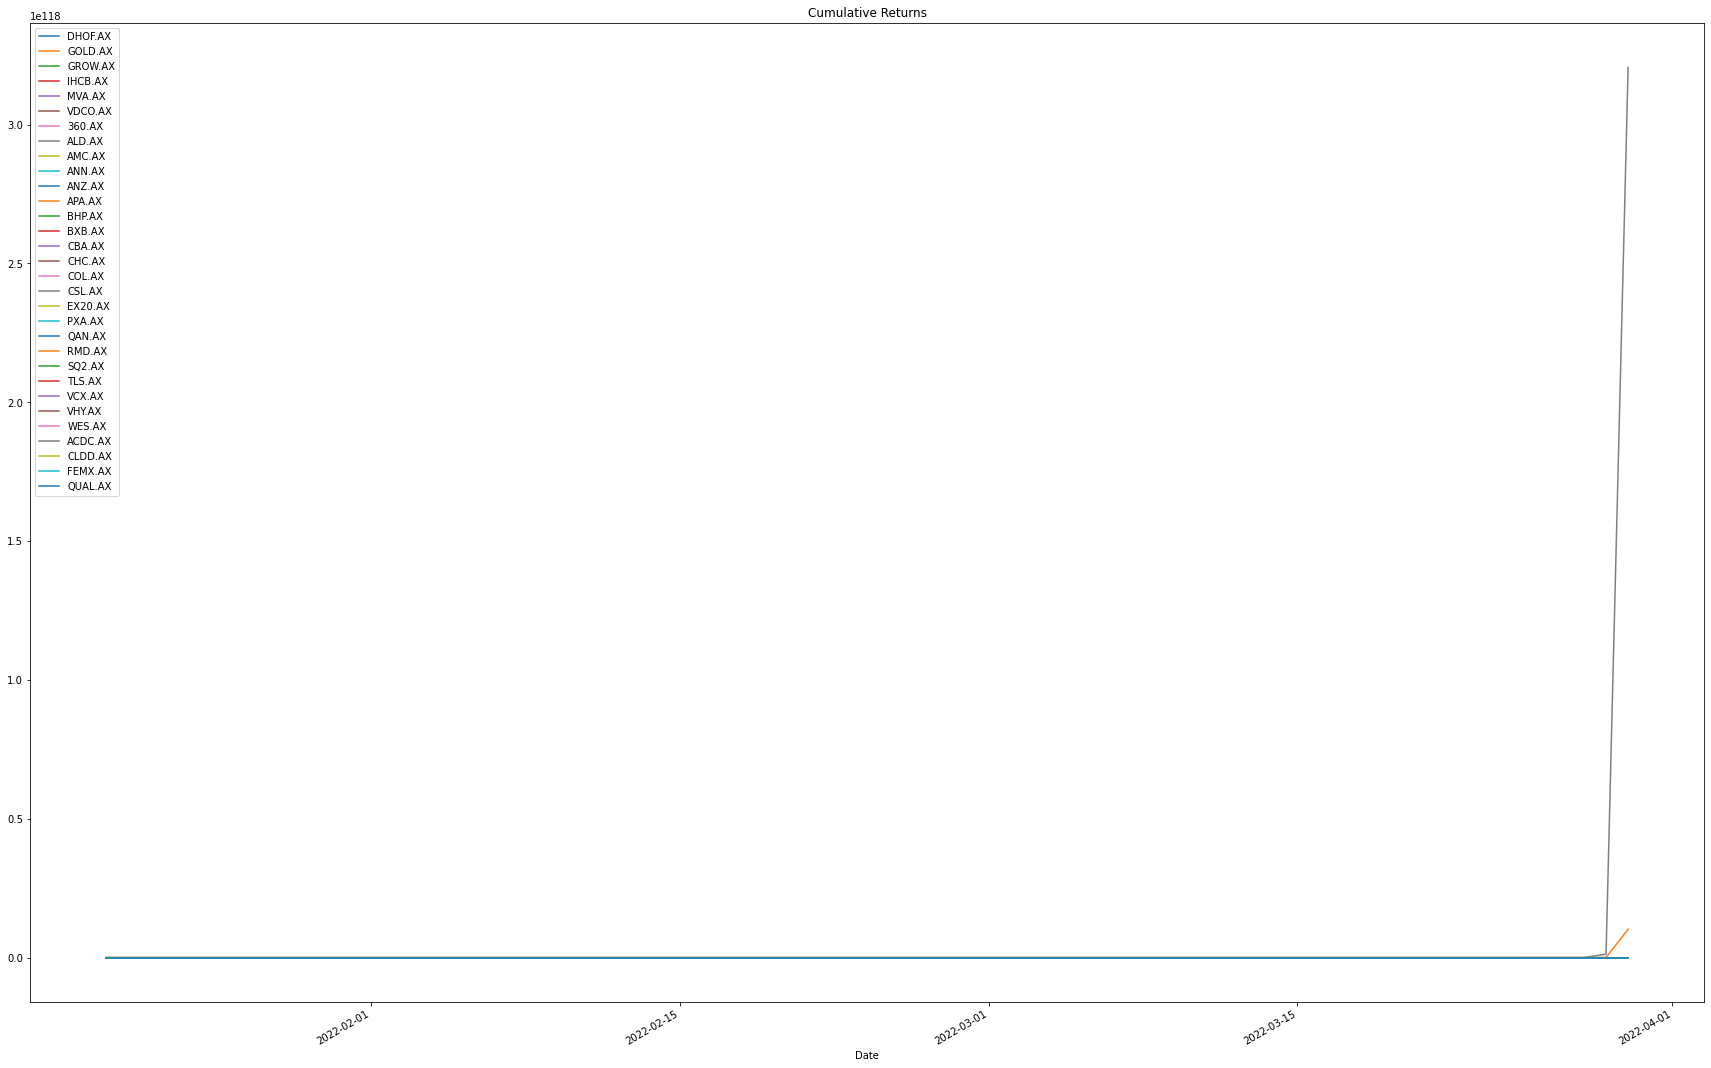

In [8]:
cumulative_returns = (1 + close_df).cumprod()

# Plot cumulative returns
cumulative_returns.plot(figsize=(30, 20), title="Cumulative Returns")